In [1]:
import math
import random
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

SAMPLE_SIZE = 50
VARIANCE = 1
CONFIDENCE_LEVEL = 0.95
DELTA = 0.001
REPETITION = 100
QUANTILE = scipy.stats.t.ppf(CONFIDENCE_LEVEL, 2 * SAMPLE_SIZE - 2)

def _fillArrayWithGauss(arr, mu):
    for i in range(arr.size):
        arr[i] = random.gauss(mu,VARIANCE)
    
def _countSampleVariance(sample):
    sampleMean = sample.mean()
    count = 0
    for i in range(sample.size):
        count += (sample[i] - sampleMean) ** 2
        
    return count / (sample.size - 1) 
    
def _studentFunction(X, Y):
    Xmean = X.mean()
    Ymean = Y.mean()
    
    Sx = math.sqrt(((X.size - 1) * _countSampleVariance(X) + 
                       (Y.size - 1) * _countSampleVariance(Y)) / (X.size + Y.size - 2))
    Tvalue = (Ymean - Xmean)/(Sx * math.sqrt(1 / X.size + 1 / Y.size))
    return Tvalue

In [2]:
def _countStudentPower(multiplier):
    results = np.empty([1, 2])

    shift = 0
    while(True):
        count = 0
        for i in range(REPETITION):
            Xsample = np.zeros(SAMPLE_SIZE * multiplier)
            Ysample = np.zeros(SAMPLE_SIZE * multiplier)
            _fillArrayWithGauss(Xsample, 0)
            _fillArrayWithGauss(Ysample, shift)
            if(_studentFunction(Xsample, Ysample) > QUANTILE):
                count += 1

        if(shift == 0):
            results[0] = [count / REPETITION, shift]
        else:
            results = np.vstack((results, np.array([count / REPETITION, shift])))
        shift += DELTA
        if(results[-1,0] == 1):
            break
    
    return results
        


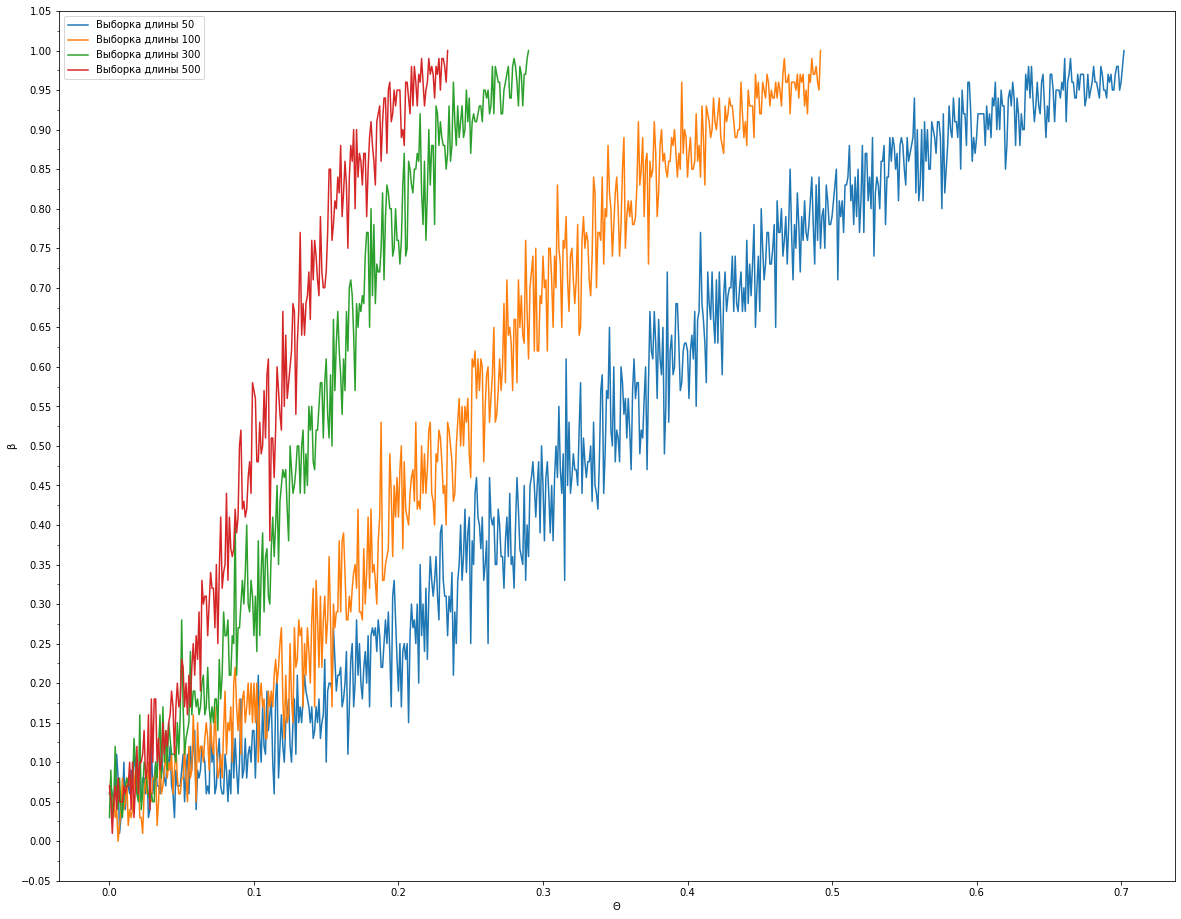

In [3]:
res50 = _countStudentPower(1)
res100 = _countStudentPower(2)
res300 = _countStudentPower(6)
res500 = _countStudentPower(10)

fig, ax = plt.subplots()

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.025))
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))

plt.xlabel('\u0398')
plt.ylabel('\u03B2')

ax.plot(res50[:,1], res50[:,0], label = 'Выборка длины 50')
ax.plot(res100[:,1], res100[:,0], label = 'Выборка длины 100')
ax.plot(res300[:,1], res300[:,0], label = 'Выборка длины 300')
ax.plot(res500[:,1], res500[:,0], label = 'Выборка длины 500')
ax.legend()

fig.set_figwidth(20)
fig.set_figheight(16)

plt.savefig('Student.png', bbox_inches='tight')
